Cargamos librerias

In [1]:
import pandas as pd
import numpy as np
#import mglearn

#Preprocesamiento
from sklearn.decomposition import PCA

#Clustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist

#Otros
import os
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

Cargamos los datos a modificar

In [2]:
test_17 = pd.read_csv("resultados-del-test-2017-18.csv",sep=";")
test_18 = pd.read_csv("resultados-del-test-2018-19.csv")
test_17.columns = test_18.columns.tolist()[0:15]
tests = [test_17,test_18]

Hacemos las modificaciones pertinentes

In [3]:
for test in tests:
    
    test["datime"] = pd.to_datetime(test["fecha"]+" "+test["hora"])
    #Hacemos una nueva variable datime y le introducimos los datos de fecha y hora
    
    
    test.drop(["fecha","hora"],axis = 1,inplace=True)
    
    
    

Nos traemos solo lo que vamos a clusterizar

In [4]:
test_18

,edad,genero,barrio,pregunta_1,pregunta_2,pregunta_3,pregunta_4,pregunta_5,pregunta_6,pregunta_7,pregunta_8,pregunta_9,pregunta_10,pregunta_11,pregunta_12,pregunta_13,datime
0,21,Hombre,Villa Riachuelo,B,C,B,C,C,C,B,C,C,C,A,B,C,2019-01-23 17:31:00
1,20,Mujer,Otro,B,B,B,B,A,B,B,B,C,C,B,B,B,2019-01-23 13:59:00
2,63,Mujer,Floresta,B,C,C,C,C,C,C,C,C,C,C,C,C,2019-01-23 10:24:00
3,30,Mujer,Otro,B,A,B,A,B,B,B,B,B,B,B,A,C,2019-01-23 00:20:00
4,27,Mujer,Caballito,B,C,B,B,C,C,C,C,B,C,C,C,C,2019-01-22 23:44:00
5,26,Mujer,Palermo,B,C,C,C,C,C,C,C,C,C,C,C,C,2019-01-22 17:06:00
6,16,Mujer,Balvanera,B,C,B,C,B,C,B,C,B,B,B,B,B,2019-01-22 16:45:00
7,20,Mujer,Barracas,A,A,B,B,A,A,A,B,B,C,A,B,B,2019-01-22 01:30:00
8,32,Mujer,Balvanera,C,B,B,A,A,A,B,C,B,C,B,A,C,2019-01-21 22:21:00
9,27,Mujer,Almagro,B,B,A,A,C,A,A,B,B,C,B,C,C,2019-01-21 18:21:00


In [6]:
test_17_cluster = test_17.drop(["edad","genero","datime"],axis=1)
test_18_cluster = test_18.drop(["edad","genero","datime"],axis=1)

In [8]:
test_17 = pd.get_dummies(test_17,drop_first=True)
test_18 = pd.get_dummies(test_18,drop_first=True)
X_17 = test_17
X_18 = test_18 

Hacemos al X un array para tratarlo con mas rapidez

In [8]:
X_17 = np.array(X_17)
X_18 = np.array(X_18)

Armamos los clusters

In [9]:
Z = linkage(X, 'ward')

Vemos algunos indicadores 

In [10]:
c, coph_dists = cophenet(Z, pdist(X))
c

0.44795513159224887

In [11]:
coph_dists

array([  0.        ,  51.59300724,  36.86408526, ..., 125.70729159,
       125.70729159,  13.08064846])

Vemos el dendrograma

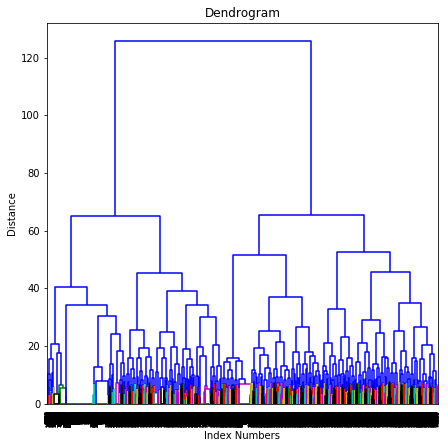

In [44]:
plt.figure(figsize=[7,7])
plt.title('Dendrogram')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  
    leaf_font_size=5.,
    color_threshold=7.5,
)
plt.show()

Nos llevamos los datos sobre el cluster pertinente

In [13]:
max_dist = 60
clusters = fcluster(Z, max_dist, criterion='distance')
clusters

array([3, 3, 3, ..., 1, 3, 3], dtype=int32)

In [14]:
#Convertimos los datos en serie para traspasarlos al dataframe
serie_clusters = pd.Series(clusters)

In [17]:
test_17 = pd.read_csv("resultados-del-test-2017-18.csv",sep=";")
test_17["cluster"] = serie_clusters

In [28]:
#Dividimos el dataframe en 2
test_17.EDAD = test_17.EDAD.astype(str)
test_17_minors = test_17[test_17["EDAD"] == "<18"].copy()
test_17_other = test_17[test_17["EDAD"] != "<18"].copy()

In [30]:
test_17_other.EDAD = test_17_other.EDAD.astype(int)

In [33]:
test_17_other.groupby(["cluster"]).mean()

,EDAD
cluster,
1,28.621350
2,27.862108
3,30.563763
4,29.406827


In [36]:
test_17_other.groupby(["cluster","GENERO"])["GENERO"].count()

cluster  GENERO
1        HOMBRE     455
         MUJER     1734
         OTRO         3
2        HOMBRE     868
         MUJER     1771
         OTRO         8
3        HOMBRE     739
         MUJER     1960
         OTRO        22
4        HOMBRE     908
         MUJER     2275
         OTRO        10
Name: GENERO, dtype: int64

In [47]:
test_17 pd.Series(test_17_other.groupby(["cluster","PREG_2"])["PREG_1"].count())

cluster  PREG_2
1        A           57
         B           82
         C         2053
2        A          267
         B          660
         C         1720
3        A          989
         B          886
         C          846
4        A          484
         B          759
         C         1950
Name: PREG_1, dtype: int64

In [37]:
test_17

,FECHA,HORA,EDAD,GENERO,BARRIO,PREG_1,PREG_2,PREG_3,PREG_4,PREG_5,PREG_6,PREG_7,PREG_8,PREG_9,PREG_10,cluster
0,13/02/2017,23:41,28,HOMBRE,PALERMO,B,B,B,B,B,B,B,B,B,B,3
1,13/02/2017,20:09,23,MUJER,BALVANERA,B,B,B,B,B,B,B,B,B,B,3
2,13/02/2017,20:07,22,MUJER,BALVANERA,A,A,A,A,A,A,A,A,B,C,3
3,13/02/2017,20:04,34,MUJER,VILLA PUEYRREDON,C,C,B,C,B,C,C,C,C,B,3
4,13/02/2017,19:34,31,MUJER,CABALLITO,C,C,C,C,C,C,C,C,C,C,1
5,13/02/2017,18:53,31,HOMBRE,BOEDO,A,B,B,B,A,B,A,A,B,B,3
6,13/02/2017,18:44,28,HOMBRE,PALERMO,A,A,A,A,A,A,A,A,A,A,3
7,13/02/2017,18:09,29,MUJER,MATADEROS,C,C,C,C,C,C,C,C,C,C,1
8,13/02/2017,18:05,28,HOMBRE,PALERMO,C,C,C,C,C,C,C,C,C,C,1
9,13/02/2017,18:01,26,MUJER,RECOLETA,A,B,B,A,C,B,B,A,C,C,4


In [102]:
grupo.head()

,fecha,hora,edad,genero,barrio,pregunta_1,pregunta_2,pregunta_3,pregunta_4,pregunta_5,pregunta_6,pregunta_7,pregunta_8,pregunta_9,pregunta_10,cluster
0,13/02/2017,23:41,28,HOMBRE,PALERMO,B,B,B,B,B,B,B,B,B,B,3
1,13/02/2017,20:09,23,MUJER,BALVANERA,B,B,B,B,B,B,B,B,B,B,3
2,13/02/2017,20:07,22,MUJER,BALVANERA,A,A,A,A,A,A,A,A,B,C,3
3,13/02/2017,20:04,34,MUJER,VILLA PUEYRREDON,C,C,B,C,B,C,C,C,C,B,3
4,13/02/2017,19:34,31,MUJER,CABALLITO,C,C,C,C,C,C,C,C,C,C,1
5,13/02/2017,18:53,31,HOMBRE,BOEDO,A,B,B,B,A,B,A,A,B,B,3
7,13/02/2017,18:09,29,MUJER,MATADEROS,C,C,C,C,C,C,C,C,C,C,1
8,13/02/2017,18:05,28,HOMBRE,PALERMO,C,C,C,C,C,C,C,C,C,C,1
9,13/02/2017,18:01,26,MUJER,RECOLETA,A,B,B,A,C,B,B,A,C,C,4
11,13/02/2017,17:54,35,MUJER,BOEDO,C,C,C,C,C,C,C,C,C,C,1


In [106]:
test_test.groupby(["cluster","genero"])["genero"].count()

cluster  genero
1        HOMBRE     475
         MUJER     1861
         OTRO         3
2        HOMBRE     900
         MUJER     1979
         OTRO         8
3        HOMBRE     771
         MUJER     2157
         OTRO        26
4        HOMBRE     961
         MUJER     2489
         OTRO        13
Name: genero, dtype: int64

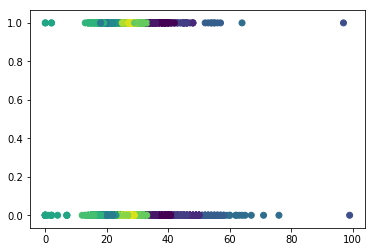

In [20]:
plt.scatter(X[:,0], X[:,1], c=clusters)
plt.show()

In [21]:
def eval_clusters_linkage(X, link_method):
    L = linkage(X, link_method)
    c, coph_dists = cophenet(L, pdist(X))
    print(link_method, c)
    plt.figure(figsize=[6,6])
    plt.title('Dendrogram - Method: ' + link_method.title())
    plt.xlabel('Index Numbers')
    plt.ylabel('Distance')
    dendrogram(L, leaf_rotation=90., leaf_font_size=5.)

ward 0.6386123888898418
single 0.4603528076950997
average 0.7868931989400682
complete 0.6174287852571646


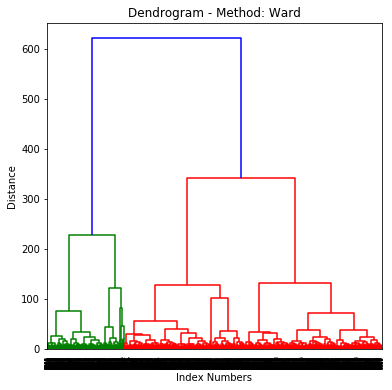

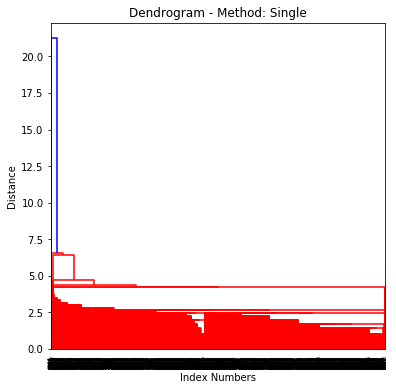

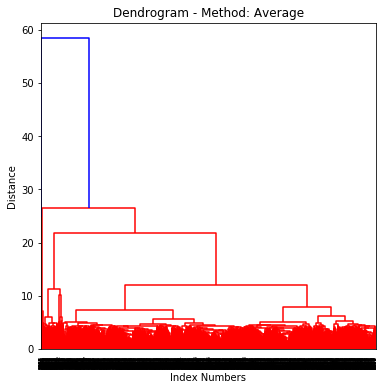

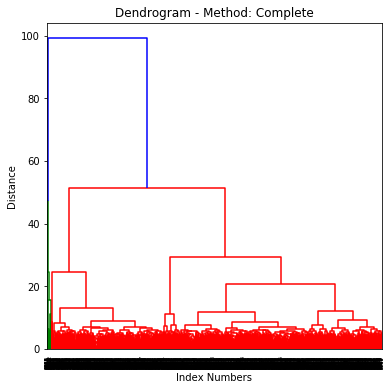

In [22]:
for i in ['ward','single','average','complete']:
    eval_clusters_linkage(X, i)

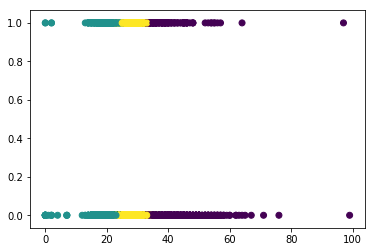

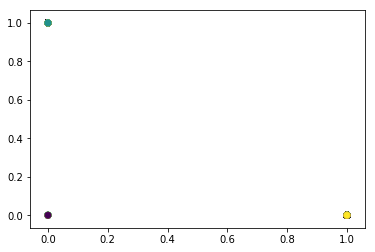

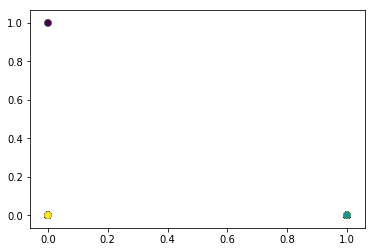

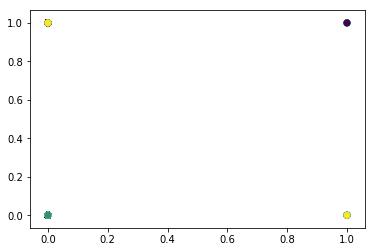

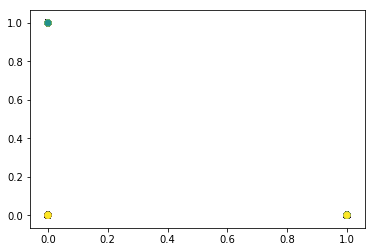

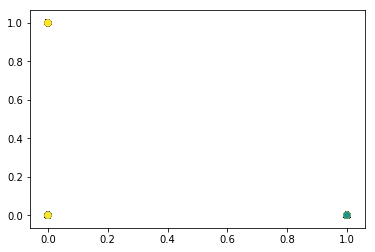

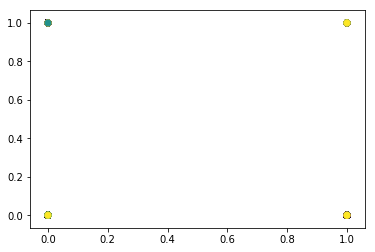

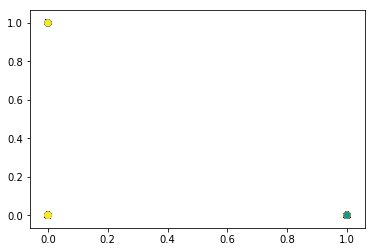

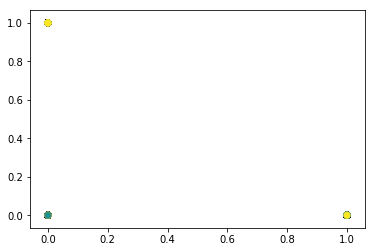

In [13]:
for i in range(0,9):
    plt.scatter(X[:,i], X[:,i+1], c=clusters)
    plt.show()

In [ ]:
sns.pairplot(pd.DataFrame(X),clusters)

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)